# Random Forest Model for Disaster Type Classification

This notebook involves training and optimizing a Random Forest Classifier for a disaster type classification. Below are the key sections, steps, and findings:

- Data Preprocessing:
    - Encodes categorical variables using one-hot encoding.
    - Splits the data into training and testing sets.

- Model Training and Hyperparameter Tuning:
    - A RandomForestClassifier is trained using a set of features extracted from the data.
    - Hyperparameter tuning is performed using RandomizedSearchCV with a 5-fold cross-validation strategy.
    
- Feature Importance Analysis:
    - Calculates the importance of features using the Random Forest model and visualizes the top 10 important features.

- Performance Evaluation:
    - Evaluates the model's performance on the test data by computing accuracy and other metrics.
    
### Key Findings

- Hyperparameter Optimization:

- Best parameters found:
    - `n_estimators: 150` 
    - `max_depth: 20` 
    - `criterion': 'gini` 
    - `bootstrap: True`

- Best cross-validation accuracy: **0.5573**
- Test accuracy: **0.5699**

- Model Performance:
    - When re-trained with optimal parameters, the test accuracy achieved was **57%**.

- Feature Importance:
    - The top features influencing the classification and their respective importance:
        1. Total Affected:     0.248865
        2. Total Deaths:       0.229223
        3. Start Month:        0.154075
        4. Disaster Duration:  0.138568

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For random forest classification and evaluation
import sklearn.tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For preprocessing data for model
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Pre-process data 

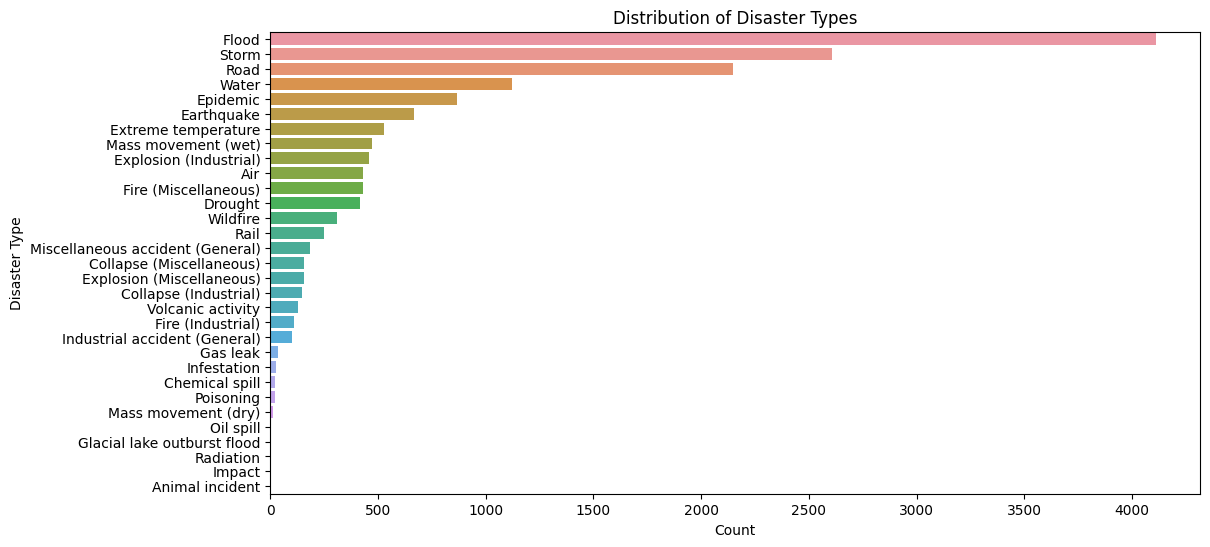

In [12]:
# Load the dataset
data_path = "./data/emdat_2020-2024_cleaned.csv" 
data = pd.read_csv(data_path)

# Test different attributes for classification
# data.head(5)

# Plot disaster type counts
plt.figure(figsize=(12, 6))
sns.countplot(y='Disaster Type', data=data, order=data['Disaster Type'].value_counts().index)
plt.title('Distribution of Disaster Types')
plt.xlabel('Count')
plt.ylabel('Disaster Type')
plt.show()

## Feature selection 

* Target variable: Disaster Type, Subtype, Group, Subgroup

* Possible Attributes for decision trees: 
    - Total affected, total deaths
    - Region, subregion, country
    - Start month, start year, event duration, start month

In [13]:
relevant_features = [
    'Total Deaths', 'Total Affected', 'Region', 'Subregion', 'Country',
    'Start Month', 'Disaster Duration'
]

# Separate features and target
# X = data.drop('Disaster Type', axis=1)
X = data[relevant_features]
y = data['Disaster Type']

# Identify numerical and categorical columns
cat_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to the categorical columns
onehot = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')  # Keep numerical columns as they are


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training and test datasets
X_train_encoded = onehot.fit_transform(X_train)
X_test_encoded = onehot.transform(X_test)

X_train = X_train_encoded
X_test = X_test_encoded

# Display the transformed data shape
X_train.shape, X_test.shape


((12757, 249), (3190, 249))

In [14]:
def show_decision_surface(model):
    """
    Helper function to visualize the decision surface of model
    :param model: Initialized KNNClassifier
    :return: None
    """
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    x_grid = np.arange(x_min, x_max, 0.1)
    y_grid = np.arange(y_min, y_max, 0.1)
    xx, yy = np.meshgrid(x_grid, y_grid)
    r1, r2 = xx.reshape(-1,1), yy.reshape(-1,1)
    grid = np.hstack((r1,r2))
    y_hat = model.predict(grid)
    zz = y_hat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='PiYG')
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

In [15]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

Accuracy: 0.56

Classification Report:
                                  precision    recall  f1-score   support

                             Air       0.21      0.19      0.20        84
                  Chemical spill       0.00      0.00      0.00         5
           Collapse (Industrial)       0.12      0.09      0.11        22
        Collapse (Miscellaneous)       0.07      0.03      0.05        30
                         Drought       0.75      0.65      0.70        81
                      Earthquake       0.58      0.52      0.55       147
                        Epidemic       0.71      0.57      0.63       168
          Explosion (Industrial)       0.40      0.38      0.39        93
       Explosion (Miscellaneous)       0.09      0.03      0.04        35
             Extreme temperature       0.67      0.48      0.56       124
               Fire (Industrial)       0.07      0.04      0.05        25
            Fire (Miscellaneous)       0.16      0.10      0.12        7

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

### Check feature importance

Top 10 Important Features:
                               Feature  Importance
246          remainder__Total Affected    0.248865
245            remainder__Total Deaths    0.229223
247             remainder__Start Month    0.154075
248       remainder__Disaster Duration    0.138568
0                   cat__Region_Africa    0.006453
7          cat__Subregion_Eastern Asia    0.005635
19   cat__Subregion_Sub-Saharan Africa    0.005062
61                  cat__Country_China    0.004722
3                   cat__Region_Europe    0.004137
13     cat__Subregion_Northern America    0.004076


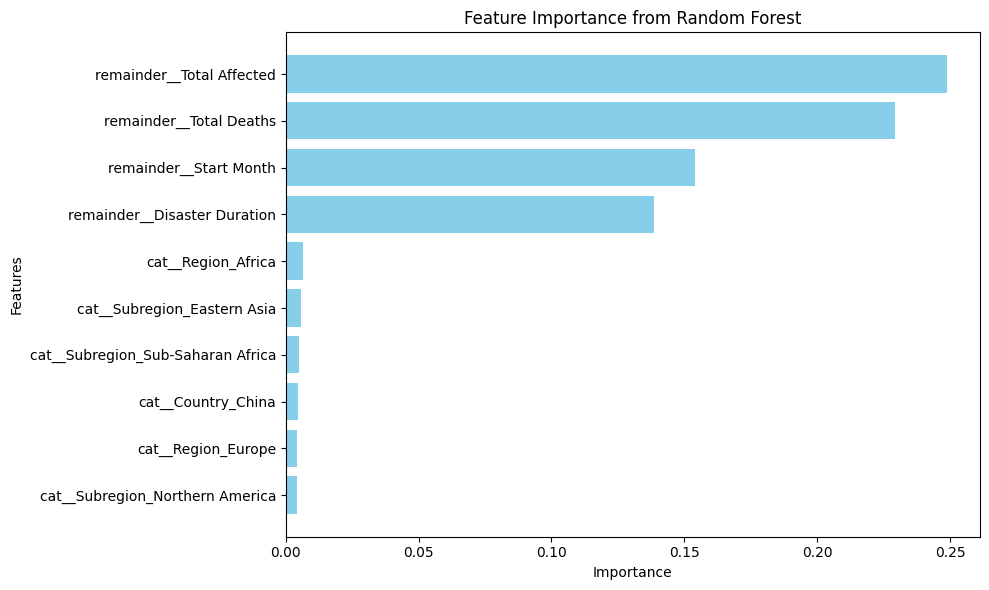

In [17]:
# Extract feature importances from the Random Forest model
importances = rf_model.feature_importances_


# Get feature names from the one hot encoder
feature_names = onehot.get_feature_names_out()

# print(f"Shape of X: {X_train_encoded.shape}")
# print(f"Length of feature importances: {len(importances)}")
# print(f"Length of feature names: {len(feature_names)}")

# Create a DataFrame to hold feature names and their corresponding importance scores
important_features = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
important_features = important_features.sort_values(by='Importance', ascending=False).head(10)

# Print the top 10 most important features
print("Top 10 Important Features:")
print(important_features.head(10))

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(important_features['Feature'], important_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


## Feature engineering for improved Accuracy

In [21]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],   # Number of trees
    'criterion': ['gini', 'entropy'], # splitting cirteria 
    'max_depth': [None, 10, 20],      # depth options
    'bootstrap': [True, False]        # Bootstrapping options
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid,
    n_iter=15,  # Number of random combinations to test
    scoring='accuracy', 
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Display progress logs
    random_state=42, 
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best combination of parameters
random_search.fit(X_train_encoded, y_train)

# Best parameters and accuracy
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print(f"Best Parameters (Randomized Search): {best_params_random}")
print(f"Best Cross-Validation Accuracy (Randomized Search): {best_score_random:.4f}")

# Evaluate on test data
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)
test_accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"Test Accuracy (Randomized Search): {test_accuracy_random:.4f}")

# Best Parameters (Randomized Search): {'n_estimators': 100, 'max_features': None, 'max_depth': 30, 'criterion': 'gini', 'bootstrap': True}
# Best Cross-Validation Accuracy (Randomized Search): 0.5427

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters (Randomized Search): {'n_estimators': 150, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Best Cross-Validation Accuracy (Randomized Search): 0.5573
Test Accuracy (Randomized Search): 0.5699


In [23]:
# Initialize the Random Forest Classifier with best parameters found
rf_model = RandomForestClassifier(n_estimators=150, max_depth=20, criterion='gini', bootstrap=True ,random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

Accuracy: 0.57
[CV] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=20, n_estimators=150; total time=   7.0s
[CV] END bootstrap=False, criterion=gini, max_depth=20, n_estimators=150; total time=   7.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, n_estimators=150; total time=   5.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, n_estimators=150; total time=   6.5s
[CV] END bootstrap=True, criterion=gini, max_depth=None, n_estimators=50; total time=   3.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=20, n_estimators=150; total time=   6.8s
[CV] END bootstrap=True, criterion=entropy, max_d